# MNIST Dynamic Filter Classification - Result

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MDR-01]
Import modules.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import models
from keras.datasets import mnist

Using TensorFlow backend.


####[MDR-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

####[MDR-03]
Mount your Google Drive on `/content/gdrive`.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDR-04]
Confirm that the exported model file `MNIST_single.hd5` is on your Google Drive.

In [4]:
!ls '/content/gdrive/My Drive/MNIST_single.hd5'

'/content/gdrive/My Drive/MNIST_single.hd5'


####[MDR-05]
Restore the model from the exported model file.

In [5]:
model = models.load_model('/content/gdrive/My Drive/MNIST_single.hd5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3212288   
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 3,222,95

####[MDR-06]
Define a model to extract outputs from intermediate layers.

In [0]:
layer_outputs = [model.get_layer('conv_filter').output,
                 model.get_layer('max_pooling').output]
model2 = models.Model(inputs=model.input, outputs=layer_outputs)

####[MDR-07]
Apply the trained filters to the MNIST dataset.

In [0]:
filter_vals = model.get_layer('conv_filter').get_weights()[0]
conv_output, pool_output = model2.predict(test_images[:9])

####[MDR-08]
Show images after applying the convolutional filters.

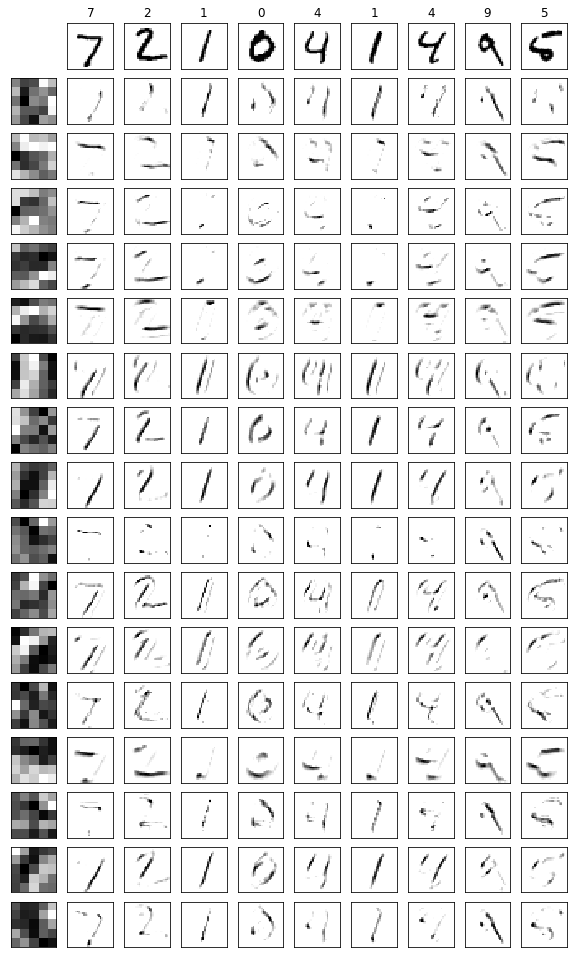

In [8]:
num_filters = 16
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_output[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')

####[MDR-09]
Show images after applying the pooling layer.

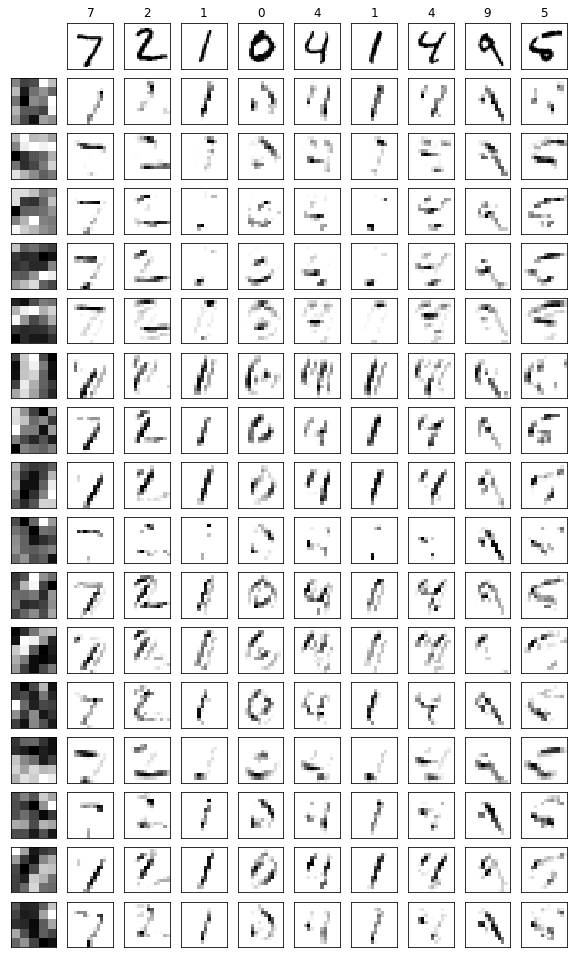

In [9]:
num_filters = 16
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_output[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')

####[MDR-10]
Show prodiction results (probability for each digit) for incorrect predictions.

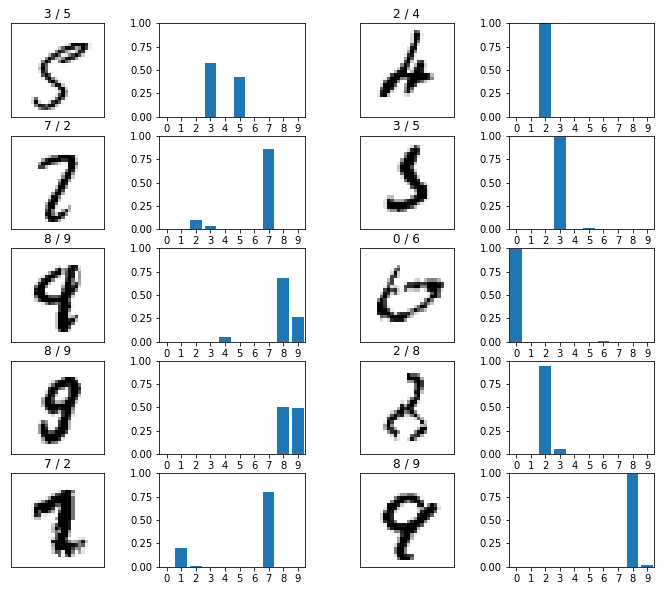

In [10]:
fig = plt.figure(figsize=(12,10))
c=0
for (image, label) in zip(test_images, test_labels):
    image
    p_val = model.predict(np.array([image]))
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5,4,c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")
    subplot = fig.add_subplot(5,4,c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10), pred, align='center')
    c += 1
    if c == 10:
        break